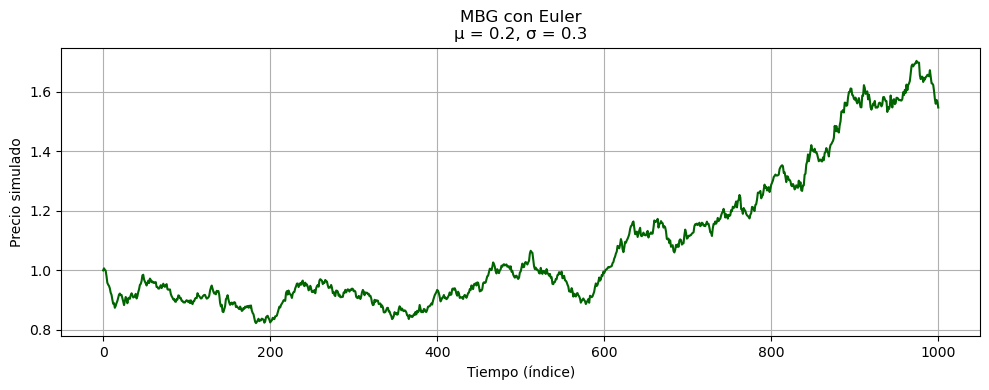

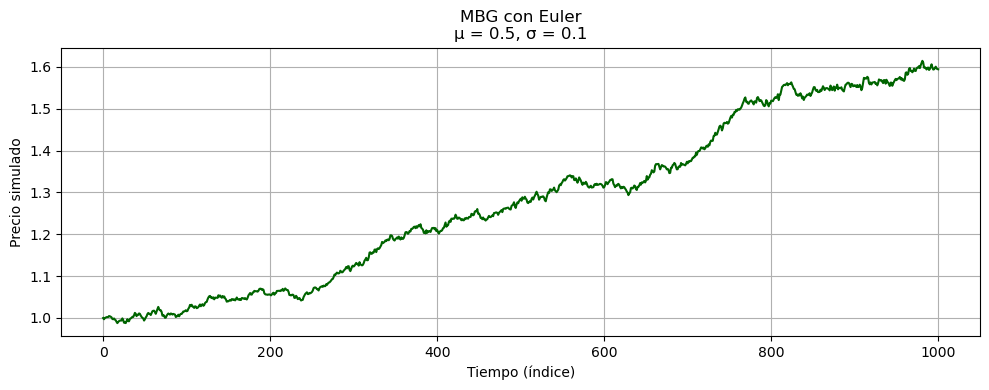

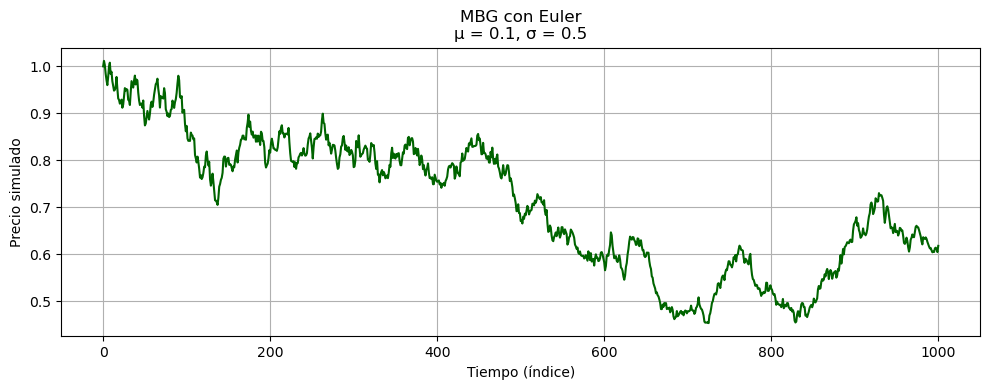

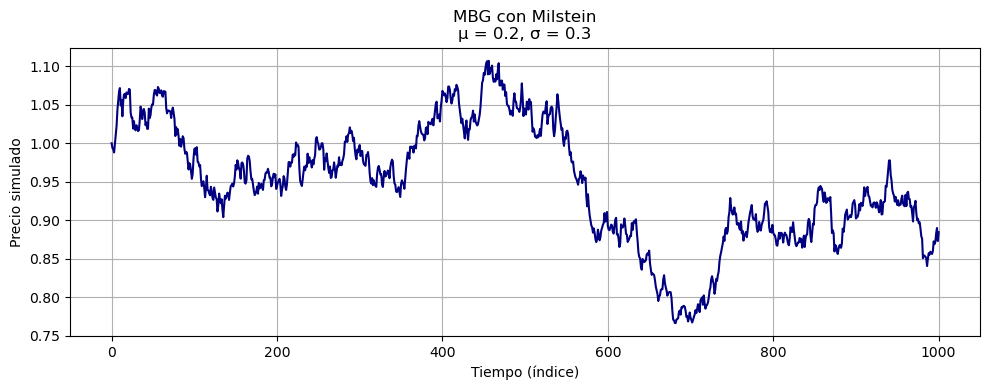

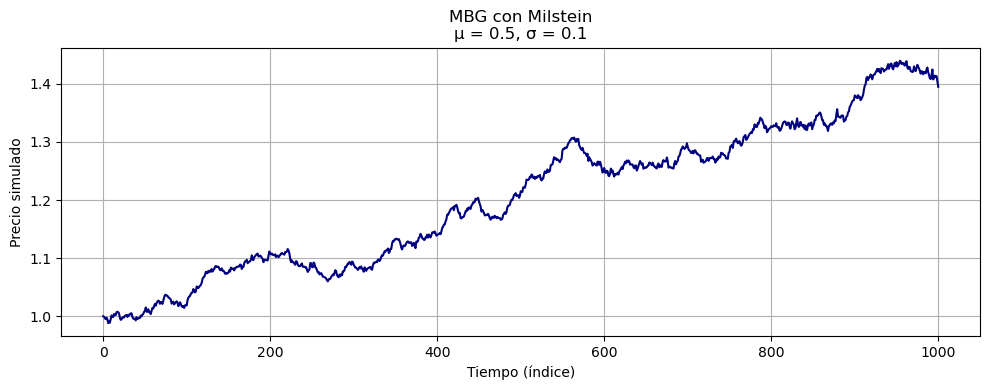

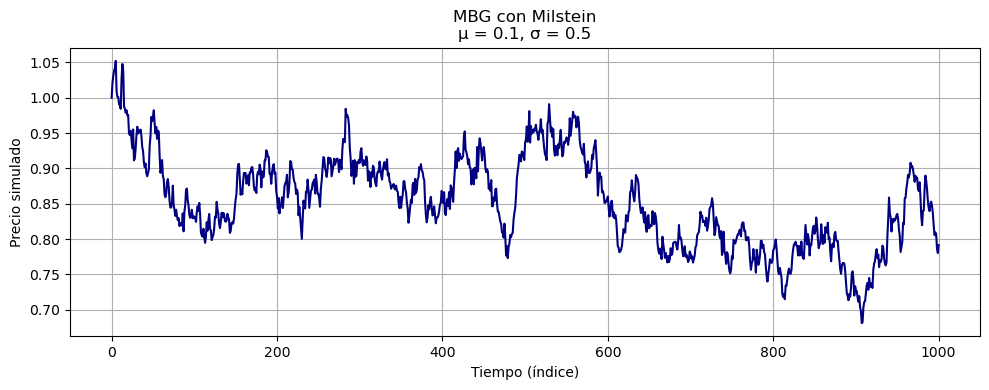

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Función para simular MBG usando Euler
def euler_GBM(S0, mu, sigma, T, N):
    dt = T / N
    dW = np.random.normal(0, np.sqrt(dt), N)
    S = np.zeros(N + 1)
    S[0] = S0
    for i in range(N):
        S[i + 1] = S[i] + mu * S[i] * dt + sigma * S[i] * dW[i]
    return S

# Función para simular MBG usando Milstein
def milstein_GBM(S0, mu, sigma, T, N):
    dt = T / N
    dW = np.random.normal(0, np.sqrt(dt), N)
    S = np.zeros(N + 1)
    S[0] = S0
    for i in range(N):
        S[i + 1] = S[i] + mu * S[i] * dt + sigma * S[i] * dW[i] + 0.5 * sigma**2 * S[i] * (dW[i]**2 - dt)
    return S

# Parámetros comunes
S0 = 1
T = 1
N = 1000

# Lista de parámetros (mu, sigma)
param_sets = [
    (0.2, 0.3),
    (0.5, 0.1),
    (0.1, 0.5)
]

# ---- Gráficas por separado: Método de Euler ----
for i, (mu, sigma) in enumerate(param_sets):
    S = euler_GBM(S0, mu, sigma, T, N)
    plt.figure(figsize=(10, 4))
    plt.plot(S, color='darkgreen')
    plt.title(f"MBG con Euler\nμ = {mu}, σ = {sigma}")
    plt.xlabel("Tiempo (índice)")
    plt.ylabel("Precio simulado")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---- Gráficas por separado: Método de Milstein ----
for i, (mu, sigma) in enumerate(param_sets):
    S = milstein_GBM(S0, mu, sigma, T, N)
    plt.figure(figsize=(10, 4))
    plt.plot(S, color='navy')
    plt.title(f"MBG con Milstein\nμ = {mu}, σ = {sigma}")
    plt.xlabel("Tiempo (índice)")
    plt.ylabel("Precio simulado")
    plt.grid(True)
    plt.tight_layout()
    plt.show()